In [1]:
##Dependencies 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import stats as sts
import numpy as np

In [2]:
### Bring in the dataset

bcorp = pd.read_csv('bcorp.csv')
bcorp.head()

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,"CPI Risk, Finance & Governance",1/13/2017,1/13/2017,certified,CPI is the professional services organisation ...,Management and Financial Consulting,Business Products & Services,"Professional services in risk, finance and gov...",Netherlands,Noord-Holland,...,NaN,2.2,2.3,NaN,2.0,NaN,NaN,2.7,NaN,1
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,E-Waste Solutions,6/8/2017,6/8/2017,certified,A market solution that seeks to reduce the env...,Recycling Services & Waste Management,Energy & Environmental Services,"collection, recovery and reuse of electrical a...",Colombia,Bogotá D.C.,...,1.1,NaN,1.6,0.8,3.2,NaN,NaN,3.7,NaN,1
4,LUMNI CHILE,8/24/2012,7/11/2017,certified,Lumni is a new kind of financial services comp...,Other,Financial Services,Equity Social Investments & Higher Education F...,Chile,Santiago,...,0.2,NaN,0.0,0.0,2.2,NaN,NaN,0.0,NaN,1


In [3]:
bcorp_US = bcorp[bcorp.country == "United States"]
for col in bcorp_US:
    print(col)

company_name
date_first_certified
date_certified
current_status
description
industry
industry_category
products_and_services
country
state
city
sector
size
b_corp_profile
website
assessment_year
overall_score
impact_area_community
impact_area_customers
impact_area_environment
impact_area_governance
impact_area_workers
impact_area_community_na_score
impact_area_customers_na_score
impact_area_environment_na_score
impact_area_governance_na_score
impact_area_workers_na_score
ia_community_it_civic_engagement_giving
ia_community_it_designed_for_charitable_giving
ia_community_it_designed_to_give
ia_community_it_diversity_inclusion
ia_community_it_job_creation
ia_community_it_local_economic_development
ia_community_it_local_involvement
ia_community_it_microdistribution_poverty_alleviation
ia_community_it_microfranchise_poverty_alleviation
ia_community_it_national_economic_development
ia_community_it_producer_cooperative
ia_community_it_suppliers_distributors
ia_community_it_suppliers_distribut

In [4]:
bcorp_US_cleaned = bcorp_US.drop(['website', 'b_corp_profile', 'description', 
                                  'industry', 'industry_category', 'products_and_services',
                                  'country', 'state', 'city', 'size', 'impact_area_community_na_score',
                                 'impact_area_customers_na_score', 'impact_area_environment_na_score', 'impact_area_governance_na_score',
                                 'impact_area_workers_na_score'], axis = 1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


# Guestion A

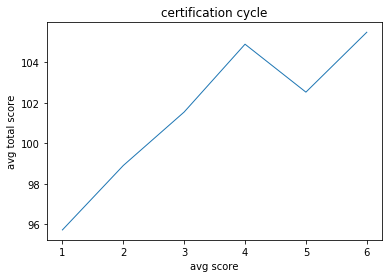

In [5]:
# Does a company’s impact score improve or worsen over the course of their tenure of certification? 
# (given that recertification is a 3 year cycle). 
avg_score=bcorp_US_cleaned.groupby('certification_cycle').mean()['overall_score']
avg_score=pd.DataFrame(avg_score)
avg_score

plt.xlabel('avg score')
plt.ylabel('avg total score')
plt.title('certification cycle')
plt.plot(avg_score, linewidth=1, markersize=10)

# plt.show()

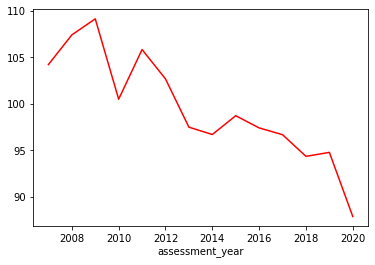

In [6]:
bcorp_US_cleaned.groupby(['assessment_year']).mean()['overall_score'].plot(label="avg score by year", color="red")
plt.show()

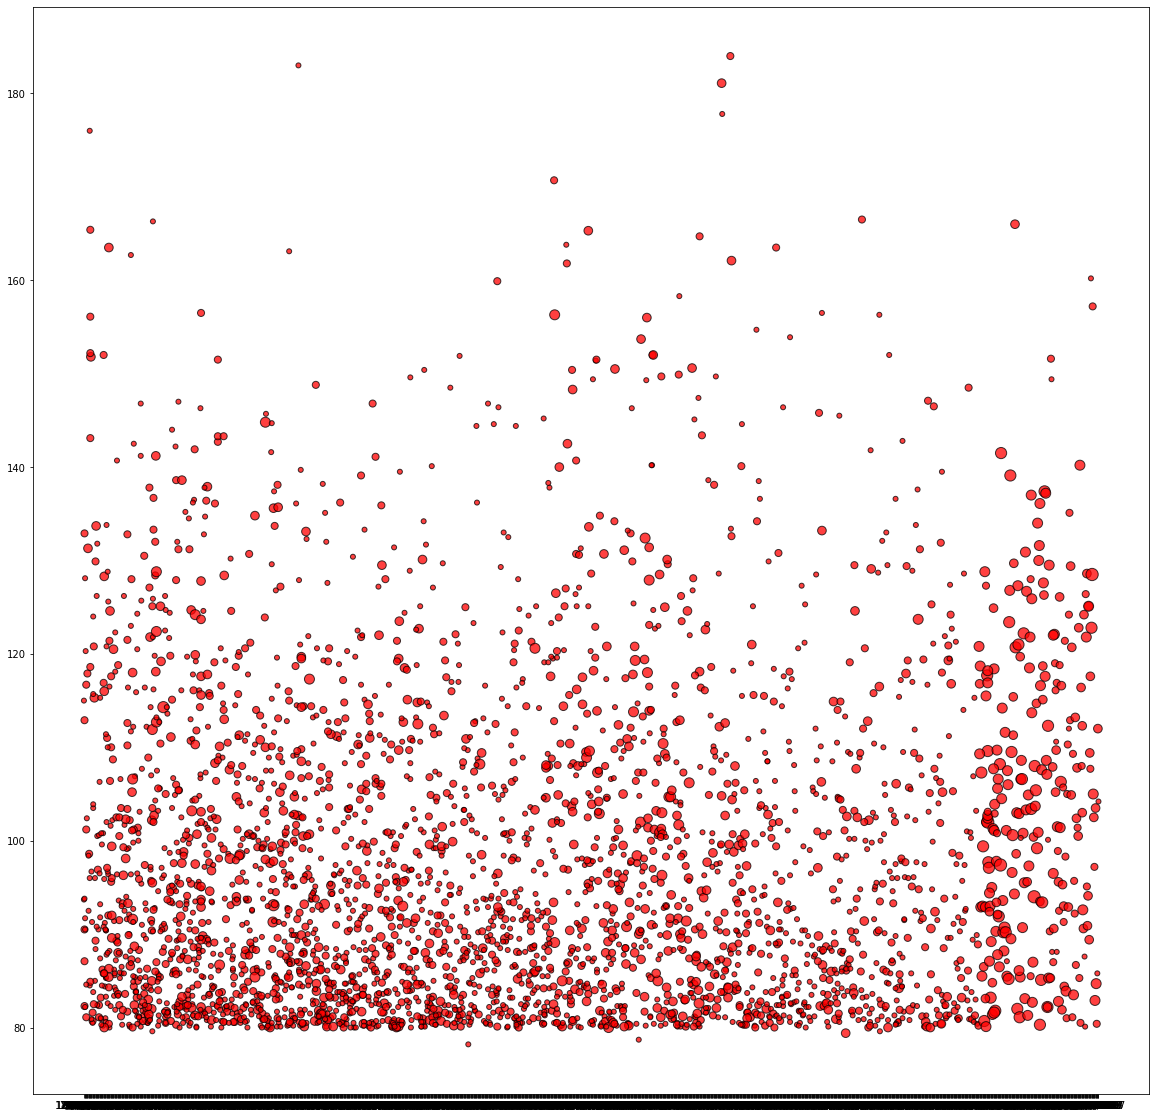

In [14]:
x_axis=bcorp_US_cleaned['date_certified']
y_axis=bcorp_US_cleaned['overall_score']
data=bcorp_US_cleaned['certification_cycle']

plt.figure(figsize=(20,20))
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75, s=data*25)
# scatterplot score, year, cycle s=data

plt.show()

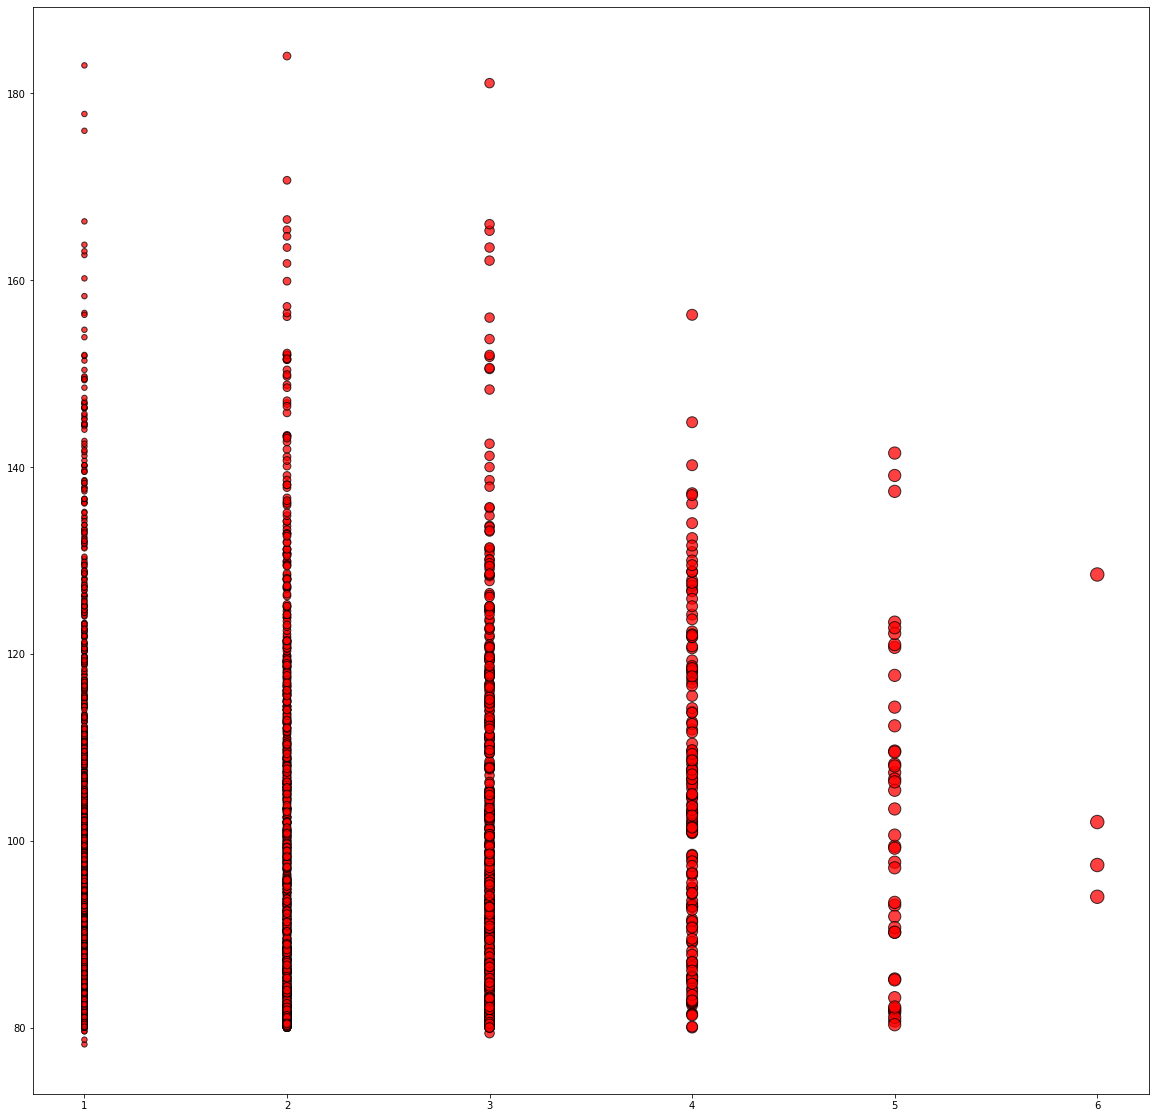

In [15]:
x_axis=bcorp_US_cleaned['certification_cycle']
y_axis=bcorp_US_cleaned['overall_score']
data=bcorp_US_cleaned['certification_cycle']
plt.figure(figsize=(20,20))
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75, s=data*30)
# scatterplot score, year, cycle s=data
plt.show()

# Question F

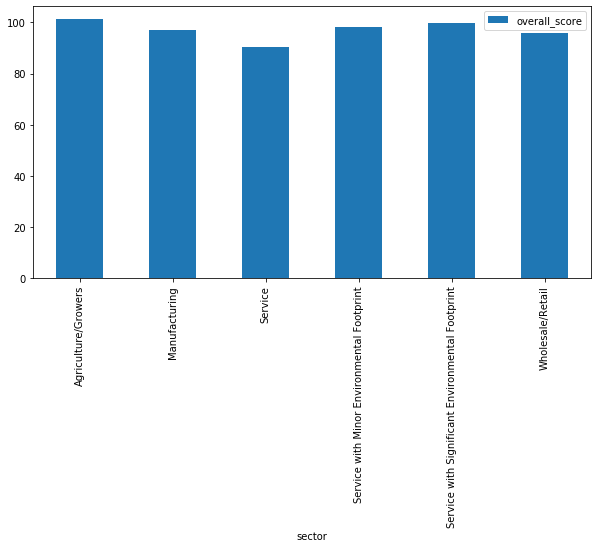

In [52]:
# What industries tend to improve their impact score over multiple certification cycles? 
# What industries tend to worsen their impact score over multiple certification cycles? 
by_sector=bcorp_US_cleaned.groupby('sector').mean()['overall_score']
by_sector=pd.DataFrame(by_sector)
# by_sector
by_sector.plot(kind="bar", figsize=(10,5))

In [58]:
avg_by_sector=bcorp_US_cleaned.groupby(['sector','certification_cycle']).mean()['overall_score']
avg_by_sector=pd.DataFrame(avg_by_sector)
avg_by_sector

overall_score
sector                                           certification_cycle               
Agriculture/Growers                              1                        98.282979
                                                 2                       105.176000
                                                 3                       102.542857
                                                 4                       134.000000
Manufacturing                                    1                        95.000930
                                                 2                        98.744828
                                                 3                        97.528125
                                                 4                       104.123529
                                                 5                       112.250000
                                                 6                       128.500000
Service                                          1                        94.100000
                                                 2                        88.150000
                                                 3                        81.000000
Service with Minor Environmental Footprint       1                        96.577680
                                                 2                        98.616981
                                                 3                       102.345238
                                                 4                       105.367708
                                                 5                       100.716000
                                                 6                        95.700000
Service with Significant Environmental Footprint 1                        96.881818
                                                 2                       100.067606
                                                 3                       106.541935
                                                 4                       111.900000
                                                 5                       116.233333
Wholesale/Retail                                 1                        93.122835
                                                 2                        98.651337
                                                 3                       100.586813
                                                 4                        99.714815
                                                 5                        98.644444
                                                 6                       102.000000

In [70]:
avg_by_sector["overall_score"].mean()

102.1022597530764

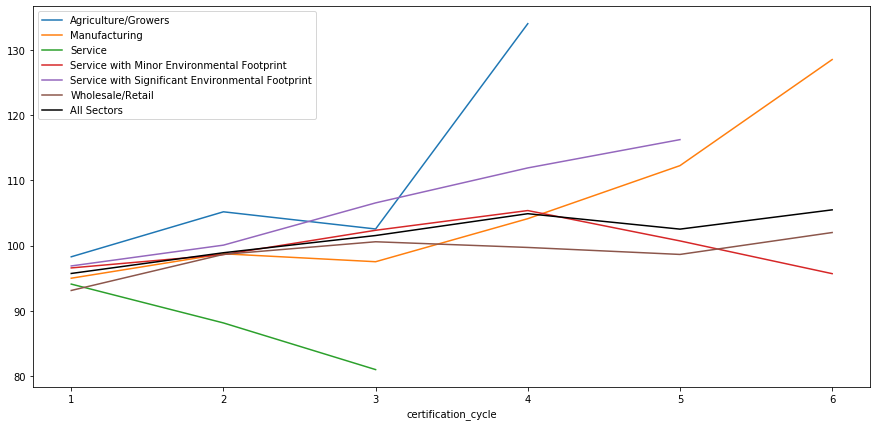

In [78]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))


# use unstack()
bcorp_US_cleaned.groupby(['certification_cycle', 'sector']).mean()['overall_score'].unstack().plot(ax=ax)
bcorp_US_cleaned.groupby(['certification_cycle']).mean()['overall_score'].plot(label="All Sectors", color="black")
plt.legend()
plt.show()

# yahoo finance api

In [21]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":"WFC","from":"1231866000","to":"1547524844","events":"div","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "bccc148a26mshbbbc1554e138225p17b074jsn4b040dfee026"
    }

response = requests.request("GET", url, headers=headers, params=querystring).json()

response

{'chart': {'result': [{'meta': {'currency': 'USD',
     'symbol': 'WFC',
     'exchangeName': 'NYQ',
     'instrumentType': 'EQUITY',
     'firstTradeDate': 76233600,
     'regularMarketTime': 1596139369,
     'gmtoffset': -14400,
     'timezone': 'EDT',
     'exchangeTimezoneName': 'America/New_York',
     'regularMarketPrice': 24.65,
     'chartPreviousClose': 24.38,
     'priceHint': 2,
     'currentTradingPeriod': {'pre': {'timezone': 'EDT',
       'start': 1596096000,
       'end': 1596115800,
       'gmtoffset': -14400},
      'regular': {'timezone': 'EDT',
       'start': 1596115800,
       'end': 1596139200,
       'gmtoffset': -14400},
      'post': {'timezone': 'EDT',
       'start': 1596139200,
       'end': 1596153600,
       'gmtoffset': -14400}},
     'dataGranularity': '1d',
     'range': '',
     'validRanges': ['1d',
      '5d',
      '1mo',
      '3mo',
      '6mo',
      '1y',
      '2y',
      '5y',
      '10y',
      'ytd',
      'max']},
    'timestamp': [12318570

In [23]:
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-earnings"

querystring = {"size":"10","region":"US","startDate":"1585155600000","endDate":"1589475600000"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "bccc148a26mshbbbc1554e138225p17b074jsn4b040dfee026"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
response.json()

{'finance': {'result': [{'ticker': 'INTC',
    'companyShortName': 'Intel Corporation',
    'startDateTime': 1587600000000,
    'startDateTimeType': 'TNS',
    'surprisePercent': 13.46,
    'rank': 781160},
   {'ticker': 'CYDY',
    'companyShortName': 'CytoDyn Inc.',
    'startDateTime': 1586390400000,
    'startDateTimeType': 'TNS',
    'surprisePercent': -166.67,
    'rank': 576425},
   {'ticker': 'BLNK',
    'companyShortName': 'Blink Charging Co.',
    'startDateTime': 1585785600000,
    'startDateTimeType': 'TNS',
    'surprisePercent': -22.22,
    'rank': 536564},
   {'ticker': 'HTBX',
    'companyShortName': 'Heat Biologics, Inc.',
    'startDateTime': 1585526400000,
    'startDateTimeType': 'TNS',
    'surprisePercent': 30.07,
    'rank': 524211},
   {'ticker': 'APHA',
    'companyShortName': 'Aphria Inc.',
    'startDateTime': 1586822400000,
    'startDateTimeType': 'TNS',
    'surprisePercent': 148.78,
    'rank': 409994},
   {'ticker': 'BAC',
    'companyShortName': 'Bank o

In [25]:
url = "https://morning-star.p.rapidapi.com/stock/get-histories"

querystring = {"PerformanceId":"0P00001GJH"}

headers = {
    'x-rapidapi-host': "morning-star.p.rapidapi.com",
    'x-rapidapi-key': "bccc148a26mshbbbc1554e138225p17b074jsn4b040dfee026"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
response.json()

[{'RequestKey': '0P00001GJH',
  '1D': [{'Volume': None,
    'Price': 8141.11,
    'DateTime': '2020-07-30T13:29:00Z',
    'Growth': 0.0,
    'CalcString': '8141.11-8141.11/8141.11',
    'ReferenceDate': 'YesterdayPrice'},
   {'Volume': 0,
    'Price': 8052.56,
    'DateTime': '2020-07-30T13:30:00Z',
    'Growth': -0.0109,
    'CalcString': '8052.56-8141.11/8141.11',
    'ReferenceDate': 'YesterdayPrice'},
   {'Volume': 0,
    'Price': 8057.63,
    'DateTime': '2020-07-30T13:31:00Z',
    'Growth': -0.0103,
    'CalcString': '8057.63-8141.11/8141.11',
    'ReferenceDate': 'YesterdayPrice'},
   {'Volume': 0,
    'Price': 8057.86,
    'DateTime': '2020-07-30T13:32:00Z',
    'Growth': -0.0102,
    'CalcString': '8057.86-8141.11/8141.11',
    'ReferenceDate': 'YesterdayPrice'},
   {'Volume': 0,
    'Price': 8068.62,
    'DateTime': '2020-07-30T13:33:00Z',
    'Growth': -0.0089,
    'CalcString': '8068.62-8141.11/8141.11',
    'ReferenceDate': 'YesterdayPrice'},
   {'Volume': 0,
    'Price': 

In [19]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_community_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [20]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_customers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [21]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_environment_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [23]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_workers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,ia_governance_it_corporate_accountability,ia_governance_it_ethics,ia_governance_it_governance,ia_governance_it_mission_engagement,ia_governance_it_mission_locked,ia_governance_it_transparency,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,NaN,0.0,NaN,NaN,4.0,2.5,3.5,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,0.0,NaN,NaN,NaN,1.9,2.5,3.5,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,NaN,0.0,NaN,NaN,1.7,7.5,3.5,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,NaN,NaN,NaN,NaN,3.7,10.0,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,NaN,0.0,NaN,NaN,1.5,2.5,1.3,2


In [37]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_governance_it' in col],axis=1)
bcorp_US_cleaned.nunique()

company_name               1817
date_first_certified       1288
date_certified             1751
current_status                2
assessment_year              14
overall_score               627
impact_area_community       629
impact_area_customers       572
impact_area_environment     545
impact_area_governance      206
impact_area_workers         396
certification_cycle           6
dtype: int64

In [42]:
companies = bcorp_US_cleaned.groupby('company_name')
companies.count()

,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle
company_name,,,,,,,,,,,
.org/advisors,1,1,1,1,1,1,1,1,1,0,1
100 Percent Wine,1,1,1,1,1,1,1,1,1,1,1
1051 by GOODONYA®,3,3,3,3,3,3,3,3,3,3,3
10Power,1,1,1,1,1,1,0,1,1,1,1
1908 Brands,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
sweetriot,1,1,1,1,1,1,1,1,1,1,1
"thedatabank, Gbc. (General Benefit Corporation)",3,3,3,3,3,3,3,3,3,3,3
therethere,1,1,1,1,1,1,1,1,1,1,1


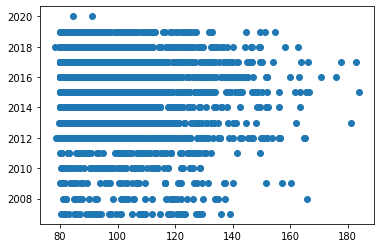

In [36]:
bcorp_US_cleaned 
plt.scatter(bcorp_US_cleaned.overall_score, bcorp_US_cleaned.assessment_year)

plt.show()


In [32]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score)
r

0.3815226252845382

In [34]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score)
r

0.22179038167069323

In [35]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_workers, bcorp_US_cleaned.overall_score)
r

nan

In [14]:
##Clean up--find nulls 
bcorp_nulls = bcorp.isnull()
bcorp_nulls2 = bcorpnulls.loc[]

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
6696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
6697,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
6698,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,True,False


In [8]:
bcorp.describe()

,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
count,6700.000000,6700.000000,6700.000000,6373.000000,6700.000000,6700.000000,6032.000000,6700.000000,6373.000000,6700.000000,...,891.000000,2211.000000,4820.000000,1714.000000,4029.000000,2098.000000,200.000000,4604.000000,420.000000,6700.000000
mean,2015.767612,96.509388,30.547619,15.572917,17.798963,12.513090,23.099577,0.714858,0.027915,0.581649,...,0.699551,2.011940,3.249876,1.029755,1.749392,6.832793,6.066000,2.669353,15.862381,1.537164
std,2.355011,16.529540,14.845124,17.178484,13.625884,3.992916,9.812453,0.909584,0.239016,1.053494,...,0.429894,0.872352,2.085339,0.714891,1.113376,3.232137,10.923335,1.935648,14.348564,0.819576
min,2007.000000,78.200000,4.400000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,83.700000,20.200000,0.000000,7.400000,9.400000,19.000000,0.000000,0.000000,0.000000,...,0.400000,1.400000,1.800000,0.600000,1.000000,4.500000,0.000000,1.800000,2.275000,1.000000
50%,2016.000000,91.300000,26.300000,9.900000,12.100000,12.500000,23.900000,0.500000,0.000000,0.200000,...,0.800000,2.000000,2.700000,1.100000,1.600000,6.900000,0.000000,2.600000,14.050000,1.000000
75%,2018.000000,104.400000,38.000000,27.100000,27.025000,15.400000,28.700000,1.100000,0.000000,0.800000,...,1.100000,2.700000,4.425000,1.300000,2.300000,9.100000,3.100000,3.000000,25.800000,2.000000
max,2020.000000,184.000000,125.400000,79.400000,96.900000,41.300000,81.800000,8.000000,8.800000,22.900000,...,1.600000,5.300000,14.400000,7.700000,9.100000,21.300000,30.000000,19.500000,61.800000,6.000000
